<a href="https://colab.research.google.com/github/vavvari/MAT421/blob/main/ModuleH_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**22.4 Numerical Error and Instability**

Accuracy and stability are both important considerations to make when thinking about integration schemes for ODEs. The term accuracy refers to a scheme’s ability to get close to the exact solution as a function of h, the step size. Stability refers to the ability to keep the error from increasing as integration occurs. The scheme is considered stable if the error does not grow. The choice of step size may affect stability. The pendulum equation can be solved using explicit, implicit, and trapezoidal formulas.

<ipython-input-1-7a15b4d791c1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


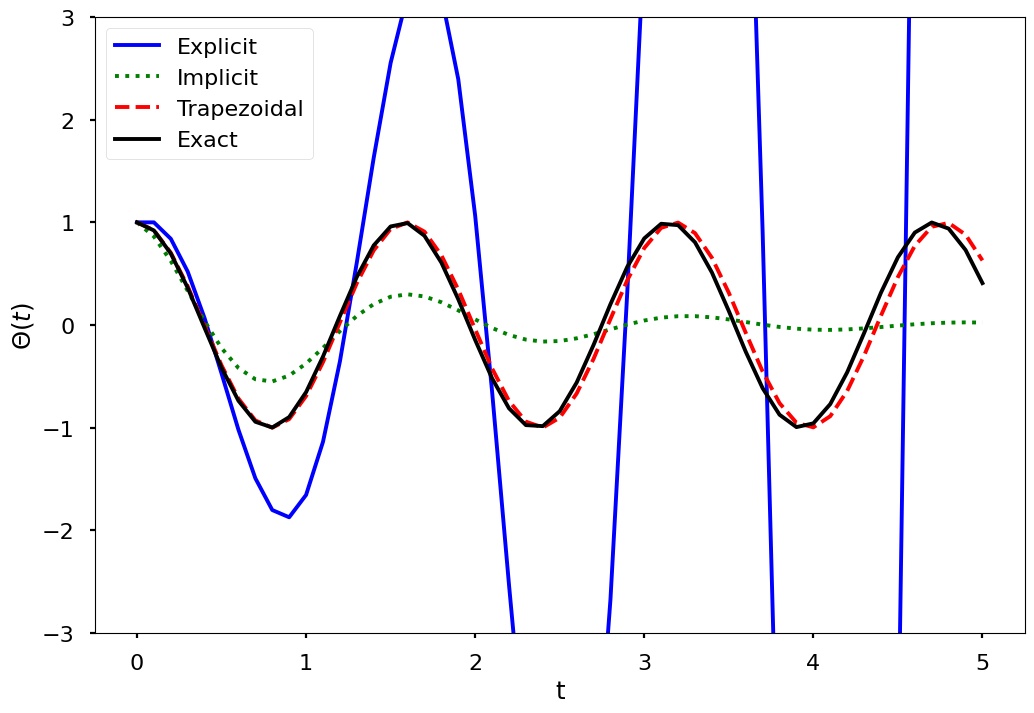

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

# step size
h = 0.1
# numerical grid
t = np.arange(0, 5.1, h)
# pendulum frequency
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h],
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2],
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# calculate integrals
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

# explicit, implicit, and trapezoidal
for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

# plot solutions to different formulas
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**22.5 Predictor-Corrector Methods**

The function $F(t, S(t))$ always returns the state of change $\frac{dS(t)}{dt}$ for any time an state value. The approximation accuracy of non-predictor-corrector methods can be improved with predictor-corrector methods of solving initial value problems that query the F function several times at different locations or predicitions. Two formulas are used, the predictor and corrector. The predictor is an explicit formula, and the corrector is applied afterwards to improve the accuracy. The midpoint formula has predictor $S\left(t_{j} + \frac{h}{2}\right) = S(t_j) + \frac{h}{2}F(t_j, S(t_j))$ and a computed corrector of $S(t_{j+1}) = S(t_j) + hF\left(t_j + \frac{h}{2}, S\left(t_{j} + \frac{h}{2}\right)\right)$

**22.6 Python ODE Solvers**

The scipy library has various built in functions for solving initial value problems. Here we will use the built in solve_ivp function to approximate the solution of $\frac{dS(t)}{dt}=\cos(t)$

<ipython-input-2-663c735ad9e7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


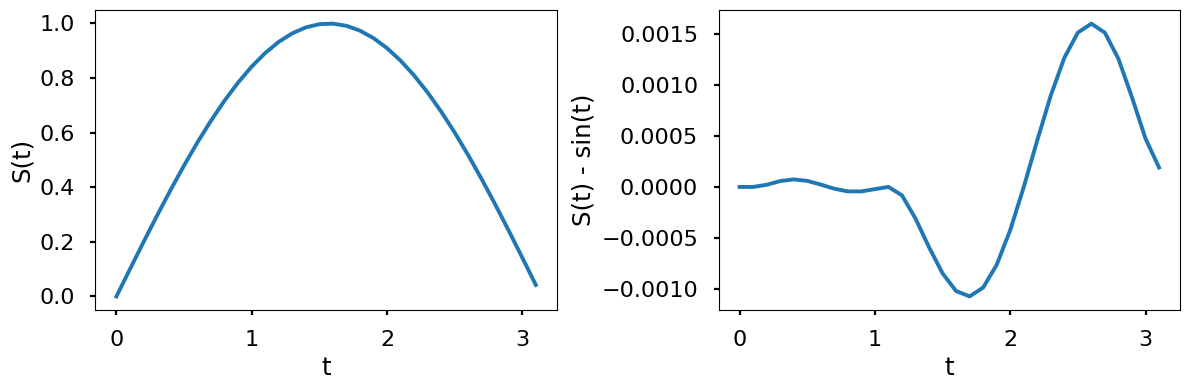

In [2]:
# imports for plot and solve_ivp function
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

# initial value problem
F = lambda t, s: np.cos(t)

# call solve_ivp function from scipy
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

# plot exact and approximate solutions
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()